# Graphical exploratory analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

In [3]:
df_swing = pd.read_csv("datasets/st1/2008_swing_states.csv")
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [4]:
interested = df_swing[["state", "county", "dem_share"]]
interested.head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


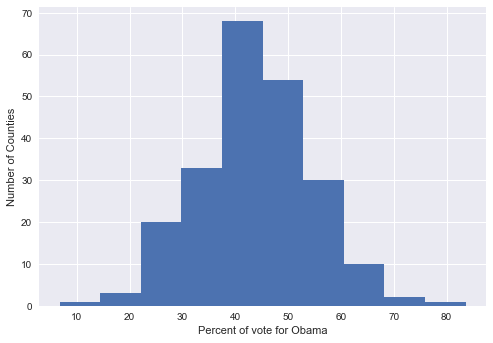

In [5]:
_ = plt.hist(df_swing["dem_share"])
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

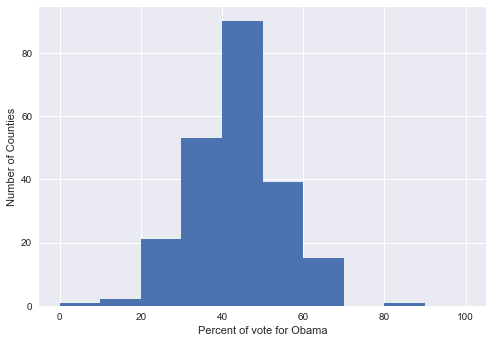

In [6]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100]

_ = plt.hist(df_swing["dem_share"], bins = bin_edges)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

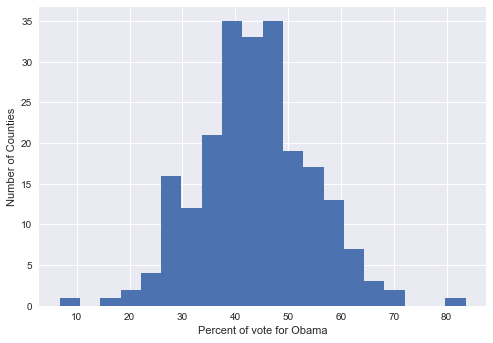

In [7]:
_ = plt.hist(df_swing["dem_share"], bins = 20)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

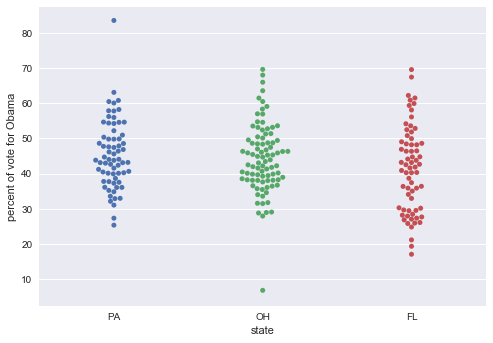

In [8]:
_ = sns.swarmplot(x = "state", y = "dem_share", data = df_swing)
_ = plt.xlabel("state")
_ = plt.ylabel("percent of vote for Obama")
plt.show()

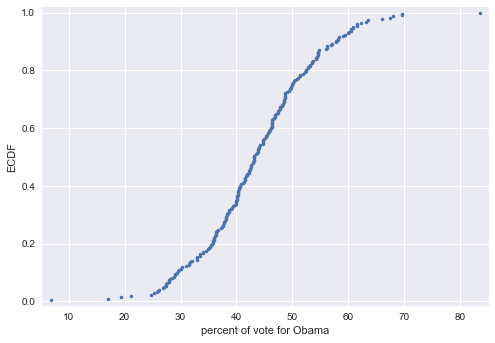

In [9]:
# Empirical cumulative distribution function (ECDF)
# 20% of counties had 36% or less vote for Obama
# 75% of counties had less than half vote for Obama

x = np.sort(df_swing["dem_share"])
y = np.arange(1, len(x) + 1) / len(x)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.xlabel("percent of vote for Obama")
_ = plt.ylabel("ECDF")
plt.margins(0.02) # keeps the data off plot edges
plt.show()

In [10]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

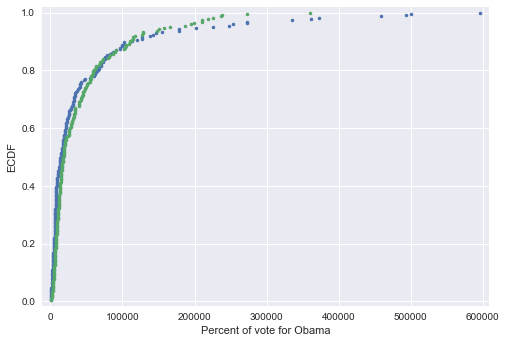

In [11]:
# dem_votes
# rep_votes

x1, y1 = ecdf(df_swing["dem_votes"])
x2, y2 = ecdf(df_swing["rep_votes"])

_ = plt.plot(x1, y1, marker = ".", linestyle = "none")
_ = plt.plot(x2, y2, marker = ".", linestyle = "none")

_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("ECDF")

plt.margins(0.02)
plt.show()

# Quantitative exploratory analysis

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

In [13]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [14]:
dem_share_PA = df_swing[df_swing["state"] == "PA"]["dem_share"]

In [15]:
np.mean(dem_share_PA)

45.476417910447765

In [22]:
np.median(dem_share_PA)

44.030000000000001

The median is the 50th percentile in the ECDF. The 50th percentile is greater than 50% of the datapoints. 

In [24]:
np.percentile(df_swing["dem_share"], [25, 50, 75])

array([ 37.3025,  43.185 ,  49.925 ])

## Boxplots

IQR = Interquartile range (middle 50% of the data). Whisker extends 1.5 IQR. While there is no single definition for an outlier, being more than 2 IQR is a common criteria.

In [26]:
df_all_states = pd.read_csv("datasets/st1/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


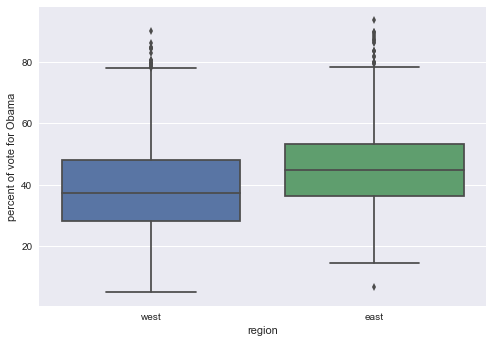

In [27]:
_ = sns.boxplot(x = "east_west", y = "dem_share", data = df_all_states)
_ = plt.xlabel("region")
_ = plt.ylabel("percent of vote for Obama")

plt.show()

In [28]:
np.var(dem_share_PA)

94.66503492982848

In [29]:
np.std(dem_share_PA)

9.729595825615187

In [30]:
difference = dem_share_PA - np.mean(dem_share_PA)
diff_sq = difference ** 2
variance_explicit = np.mean(diff_sq)

variance_np = np.var(dem_share_PA)

print(variance_explicit)
print(variance_np)

94.66503492982848
94.66503492982848


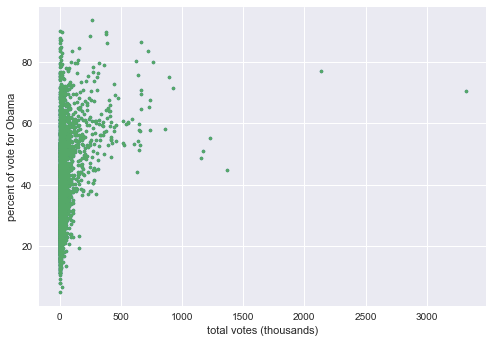

In [32]:
total_votes = df_all_states["total_votes"]
dem_share = df_all_states["dem_share"]

_ = plt.plot(total_votes / 1000, dem_share, marker = ".", linestyle = "none")
_ = plt.xlabel("total votes (thousands)")
_ = plt.ylabel("percent of vote for Obama")

plt.show()